<a href="https://colab.research.google.com/github/IndriPutriMardiana/PCVK_ganjil_2023/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MODUL 9 – Morfologi**

Nama : Indri Putri Mardiana

Kelas : TI 3B

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week9.ipynb”.

      Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element
Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png)

(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

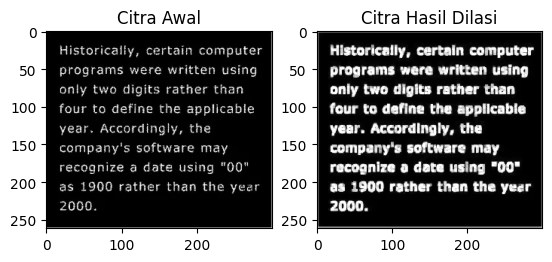

In [ ]:
img = cv2.imread('/content/drive/MyDrive/PCVK/morphology.jpg')

kernel = np.ones((3,3), np.uint8) # fungsi ones adalah untuk Membuat array dengan nilai 1, uint8 (unsigned integer 8 bit) merupakan tipe data yg digunakan untuk membuat gambar dengan menggunakan filter RGB dengan pixel dalam range [0,255].
dilation = cv2.dilate(img, kernel, iterations = 1) #iterator objek yang dapat diulangi, artinya Anda dapat melintasi semua nilai.

plt.subplot(121),plt.imshow(img),plt.title('Citra Awal') #fungsi subplots() kita bisa menggambar banyak plot dalam satu gambar.
plt.subplot(122),plt.imshow(dilation),plt.title('Citra Hasil Dilasi')

4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png, dan cetak Structuring Element-nya)

[[1 1 1]
 [1 1 1]
 [1 1 1]]


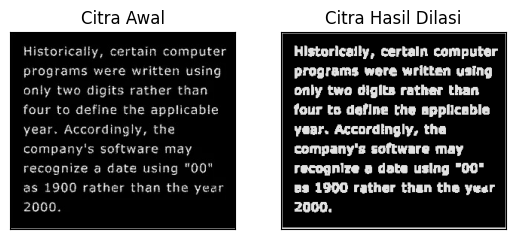

In [ ]:
img = cv2.imread('/content/drive/MyDrive/PCVK/morphology.jpg')
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3), np.uint16)
dilasi = cv2.dilate(thresh, kernel, iterations=1)
print(kernel)
plt.subplot(121), plt.imshow(img),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(dilasi), plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
j.png)

(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

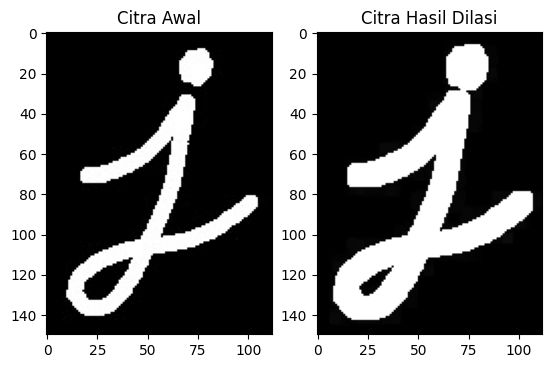

In [ ]:
img = cv2.imread('/content/drive/MyDrive/PCVK/j.jpg')
kernel = np.ones((5,5), np.uint8)
dilation = cv2.morphologyEx(img, cv2.MORPH_DILATE, kernel) #morphologyEX berfungsi untuk menghilangkan noise,

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(dilation), plt.title('Citra Hasil Dilasi')

6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga
menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)


<ipython-input-10-d7751b83ceb0>:48: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(img7, cmap="gray"),plt.title('Citra Awal')


(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

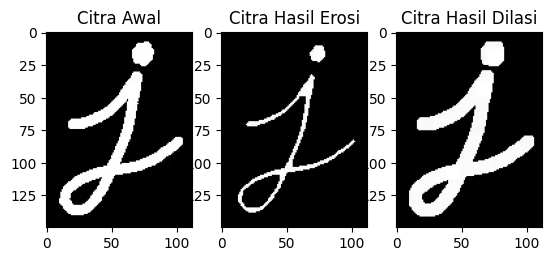

In [ ]:
img7 = cv2.imread('/content/drive/MyDrive/PCVK/j.jpg', 0)

#Acquire size of the image
m, n = img7.shape

#Show the image
plt.imshow(img7, cmap="gray")

# Define the structuring element
# k= 11,15,45 -Different sizes of the structuring element
k = 5
SE = np.ones((k,k), dtype=np.uint8)
constant = (k-1)//2

#Define new image
imgErode = np.zeros((m,n), dtype=np.uint8)

#Erosion without using inbuilt cv2 function for morphology
for i in range(constant, m-constant): #constant adalah tipe variable yang nilainya tidak dapat diubah
  for j in range(constant,n-constant):
    temp = img7[i-constant:i+constant+1, j-constant:j+constant+1] #temp digunakan untuk menampung atau menyimpan data untuk sementara
    product = temp * SE
    imgErode[i,j] = np.min(product)

#Read the image for dilation
img7_2 = imgErode

#Acquire size of the image
p, q= img7_2.shape

#Show the image
plt.imshow(img7_2, cmap="gray")

#Define new image to store the pixels of dilated image
imgDilate = np.zeros((p,q), dtype=np.uint8)

#Define the structuring element
SED = np.array([[1,1,1,1,1,1,1], [1,1,1,1,1,1,1], [1,1,1,1,1,1,1], [1,1,1,1,1,1,1], [1,1,1,1,1,1,1], [1,1,1,1,1,1,1], [1,1,1,1,1,1,1]])
constant1 = 3

#Dilation operation without using inbuilt cv2 function
for i in range(constant1, p-constant1):
  for j in range(constant1,q-constant1):
    temp = img7_2[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
    product = temp * SED
    imgDilate[i,j] = np.max(product)

plt.subplot(131),plt.imshow(img7, cmap="gray"),plt.title('Citra Awal')
plt.subplot(132),plt.imshow(imgErode, cmap="gray"),plt.title('Citra Hasil Erosi')
plt.subplot(133),plt.imshow(imgDilate, cmap="gray"),plt.title('Citra Hasil Dilasi')

7. Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)

(<Axes: title={'center': 'Citra Hasil Opening'}>,
 Text(0.5, 1.0, 'Citra Hasil Opening'))

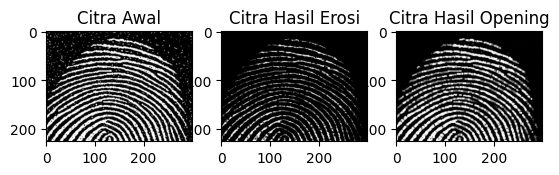

In [ ]:
img = cv2.imread('/content/drive/MyDrive/PCVK/fingerprint.jpg')
kernel = np.ones((3,3), np.uint8)
erosion = cv2.erode(img, kernel, iterations = 1)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)


plt.subplot(131), plt.imshow(img), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(erosion), plt.title('Citra Hasil Erosi')
plt.subplot(133), plt.imshow(opening), plt.title('Citra Hasil Opening')

8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)

(<Axes: title={'center': 'Citra Hasil Closing'}>,
 Text(0.5, 1.0, 'Citra Hasil Closing'))

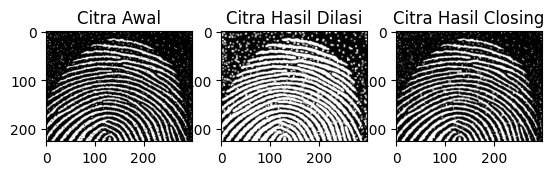

In [ ]:
img = cv2.imread('/content/drive/MyDrive/PCVK/fingerprint.jpg')
kernel = np.ones((3,3), np.uint8)
dilation =  cv2.morphologyEx(img, cv2.MORPH_DILATE, kernel)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

plt.subplot(131), plt.imshow(img), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(dilation), plt.title('Citra Hasil Dilasi')
plt.subplot(133), plt.imshow(closing), plt.title('Citra Hasil Closing')

9. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Cross 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)


SED = Cross 3


(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

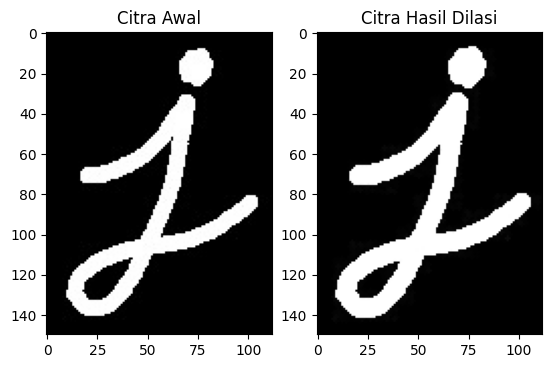

In [ ]:

img = cv2.imread('/content/drive/MyDrive/PCVK/j.jpg')

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
dilation = cv2.dilate(img, kernel, iterations = 1)

print("SED = Cross 3")

plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.subplot(122),plt.imshow(dilation),plt.title('Citra Hasil Dilasi')

SED = Cross 5


(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

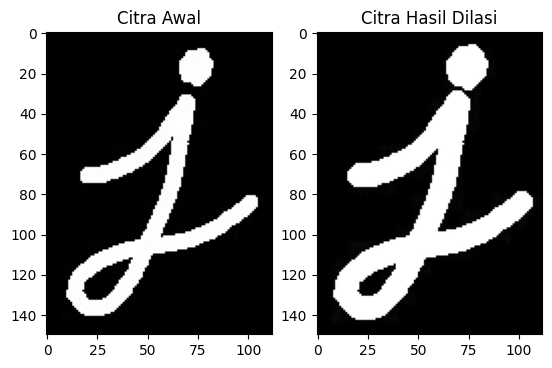

In [ ]:
img = cv2.imread('/content/drive/MyDrive/PCVK/j.jpg')
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
dilation = cv2.dilate(img, kernel, iterations = 1)

print("SED = Cross 5")

plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.subplot(122),plt.imshow(dilation),plt.title('Citra Hasil Dilasi')

10. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Circular 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:
(Gunakan gambar j.png)

SED = Cross 3


(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

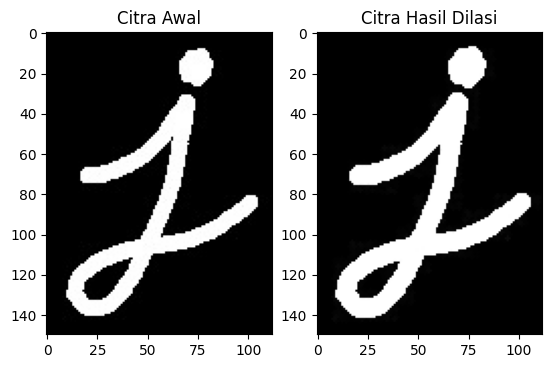

In [ ]:

img = cv2.imread('/content/drive/MyDrive/PCVK/j.jpg')

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
dilation = cv2.dilate(img, kernel, iterations = 1)

print("SED = Cross 3")

plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.subplot(122),plt.imshow(dilation),plt.title('Citra Hasil Dilasi')

SED = Cross 3


(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

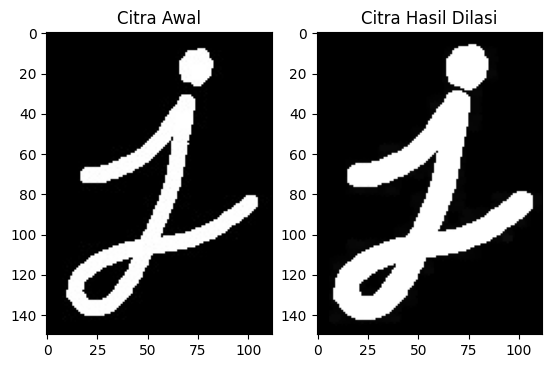

In [ ]:

img = cv2.imread('/content/drive/MyDrive/PCVK/j.jpg')

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
dilation = cv2.dilate(img, kernel, iterations = 1)

print("SED = Cross 3")

plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.subplot(122),plt.imshow(dilation),plt.title('Citra Hasil Dilasi')

11. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Rectangle 3 x 5 dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini:
(Gunakan gambar j.png)


SE = Rectangle 3x5


(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

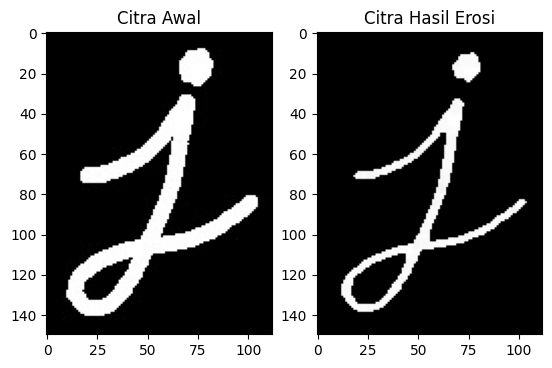

In [ ]:
img = cv2.imread('/content/drive/MyDrive/PCVK/j.jpg')

kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,5))
erosion = cv2.erode(img, kernel, iterations = 1)

print("SE = Rectangle 3x5")

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')

SE = Rectangle 3x5


(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

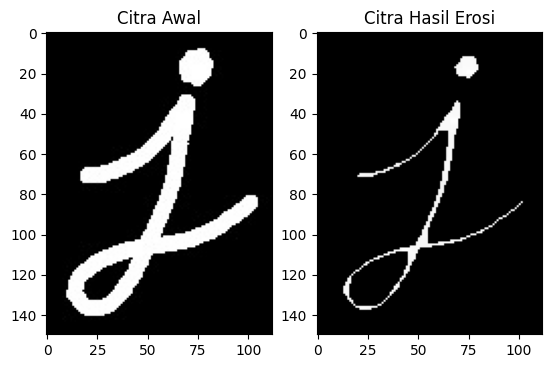

In [ ]:
img = cv2.imread('/content/drive/MyDrive/PCVK/j.jpg')

kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,7))
erosion = cv2.erode(img, kernel, iterations = 1)

print("SE = Rectangle 3x5")

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')

12. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)

SE = Line Vertikal 3


(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

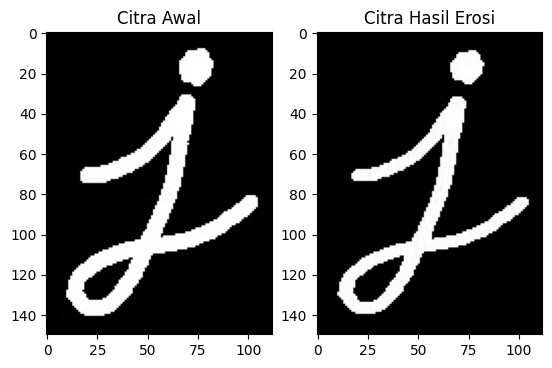

In [ ]:
img = cv2.imread('/content/drive/MyDrive/PCVK/j.jpg')

kernel = np.ones((3,1),np.uint8)
erosion = cv2.morphologyEx(img, cv2.MORPH_ERODE, kernel)

print("SE = Line Vertikal 3")

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')

SE = Line Vertikal 3


(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

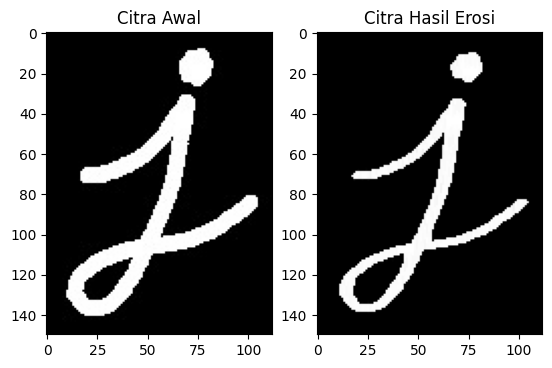

In [ ]:
img = cv2.imread('/content/drive/MyDrive/PCVK/j.jpg')

kernel = np.ones((5,1),np.uint8)
erosion = cv2.morphologyEx(img, cv2.MORPH_ERODE, kernel)

print("SE = Line Vertikal 3")

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')